# 载入数据

In [1]:
import tensorflow as tf

#导入Tensorflow提供的读取MNIST的模块
import tensorflow.examples.tutorials.mnist.input_data as input_data

#读取MNIST数据
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# 建立模型

In [2]:
#定义全连接层函数
def fcn_layer(inputs,           #输入数据
              input_dim,        #输入神经元数量
              output_dim,       #输出神经元数量
              activation=None): #激活函数
    W = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1)) #以截断正态分布的随机数初始化W
    b = tf.Variable(tf.zeros([output_dim])) #以0初始化b
    XWb = tf.matmul(inputs, W) + b #建立表达式: inputs * W + b
    if activation is None: #默认有使用激活函数
        outputs = XWb
    else: # 若传入激活函数，则用其对输出结果进行变换
        outputs = activation(XWb)
    return outputs

# 构建输入层

In [3]:
x = tf.placeholder(tf.float32, [None, 784], name="X")

In [4]:
image_shaped_input = tf.reshape(x,[-1,28,28,1])
tf.summary.image('input', image_shaped_input, 10)

<tf.Tensor 'input:0' shape=() dtype=string>

In [5]:
H1_NN = 256 # 隐藏层神经元为256

# 构建隐藏层

In [6]:
h1 = fcn_layer(inputs=x,
               input_dim=784,
               output_dim=H1_NN,
               activation=tf.nn.relu)

# 构建输出层

In [7]:
forward = fcn_layer(inputs=h1,
               input_dim=H1_NN,
               output_dim=10,
               activation=None)
pred = tf.nn.softmax(forward)

In [8]:
tf.summary.histogram('forward', forward)

<tf.Tensor 'forward:0' shape=() dtype=string>

# 训练模型

### 定义标签数据占位符

In [9]:
y = tf.placeholder(tf.float32, [None, 10], name="Y")

### 定义损失函数

In [10]:
#交叉熵
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=forward, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### TensorBoard:将loss损失以标量显示

In [11]:
tf.summary.scalar('loss', loss_function)

<tf.Tensor 'loss:0' shape=() dtype=string>

### 设置训练参数

In [12]:
train_epochs = 40
batch_size = 50
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 1
learning_rate = 0.01

### 选择优化器

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

### 定义准确率

In [14]:
correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#### TensorBoard:将acuracy准确率以标量显示

In [15]:
tf.summary.scalar('accuracy', accuracy)

<tf.Tensor 'accuracy:0' shape=() dtype=string>

### 训练模型

In [16]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())

#### TensorBoard:合并所有summary

In [17]:
merged_summary_op = tf.summary.merge_all()
writer = tf.summary.FileWriter('log/', sess.graph) #创建写入符
#执行tensorboard命令: tensorboard --logdir=log

In [18]:
#记录训练开始时间
from time import time
startTime = time()

for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict={x: xs, y: ys})
        
        #生成summary
        summary_str = sess.run(merged_summary_op, feed_dict={x: xs, y: ys})
        writer.add_summary(summary_str, epoch) # 将summary 写入文件
        
    #total_batch个批次训练完成后，使用验证数据计算误差与准确率
    loss, acc = sess.run([loss_function, accuracy],feed_dict={x: mnist.validation.images,
                                                              y: mnist.validation.labels})
    if(epoch+1) % display_step ==0:
        print("Train Epoch:","%02d" % (epoch+1),
              "Loss=","{:.9f}".format(loss), " Accuracy=","{:.4f}".format(acc))
#运行总时间
duration = time()-startTime
print("Train Finished takes:","{:.2f}".format(duration))

Train Epoch: 01 Loss= 0.158185497  Accuracy= 0.9556
Train Epoch: 02 Loss= 0.168379396  Accuracy= 0.9572
Train Epoch: 03 Loss= 0.153780401  Accuracy= 0.9622
Train Epoch: 04 Loss= 0.128042251  Accuracy= 0.9698
Train Epoch: 05 Loss= 0.139915168  Accuracy= 0.9682
Train Epoch: 06 Loss= 0.166132197  Accuracy= 0.9706
Train Epoch: 07 Loss= 0.173194513  Accuracy= 0.9704
Train Epoch: 08 Loss= 0.206810817  Accuracy= 0.9702
Train Epoch: 09 Loss= 0.184400722  Accuracy= 0.9684
Train Epoch: 10 Loss= 0.171816722  Accuracy= 0.9714
Train Epoch: 11 Loss= 0.214076370  Accuracy= 0.9686
Train Epoch: 12 Loss= 0.225170940  Accuracy= 0.9680
Train Epoch: 13 Loss= 0.242921874  Accuracy= 0.9704
Train Epoch: 14 Loss= 0.251588225  Accuracy= 0.9698
Train Epoch: 15 Loss= 0.238595068  Accuracy= 0.9720
Train Epoch: 16 Loss= 0.252162695  Accuracy= 0.9746
Train Epoch: 17 Loss= 0.243355319  Accuracy= 0.9738
Train Epoch: 18 Loss= 0.304598123  Accuracy= 0.9728
Train Epoch: 19 Loss= 0.288575888  Accuracy= 0.9716
Train Epoch:

# 评估模型

In [19]:
# 完成训练后,在测试集上评估模型的准确率
accu_test = sess.run(accuracy,feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("Test Accuracy:", accu_test)

# 完成训练后,在验证集上评估模型的准确率
accu_validation = sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
print("Test Accuracy:", accu_validation)

# 完成训练后,在训练集上评估模型的准确率
accu_train = sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels})
print("Test Accuracy:", accu_train)

Test Accuracy: 0.9718
Test Accuracy: 0.9738
Test Accuracy: 0.99307275


In [20]:
import matplotlib.pyplot as plt
import numpy as np
prediction_result=sess.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})

def plot_images_labels_prediction(images, 
                                 labels,
                                 prediction,
                                 index,
                                 num=10):
    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5,5,i+1)
        
        ax.imshow(np.reshape(images[index], (28, 28)), cmap="binary")
        
        if np.argmax(labels[index]) != prediction[index]:
            title = "label=" + str(np.argmax(labels[index]))
            if len(prediction) > 0:
                title += ", predict=" + str(prediction[index])
        else:
            title = "label=predict=" + str(np.argmax(labels[index]))
        
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()

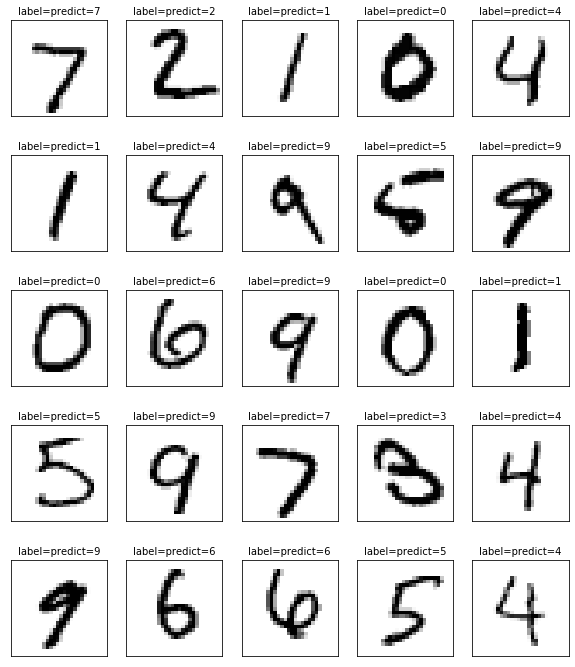

In [21]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0, 25)